In [1]:
import numpy as np

# Step 1: Define the activation function and its derivative (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Step 2: Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        # Forward pass: sum(weights * inputs) and apply activation function
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(z)

    def fit(self, X, y):
        # Training process
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Get prediction
                y_pred = self.predict(X[i])
                # Calculate the error
                error = y[i] - y_pred
                # Update weights and bias
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error  # bias term

# Step 3: Create a simple binary dataset
# AND gate example
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # inputs
y = np.array([0, 0, 0, 1])                      # outputs (AND gate truth table)

# Step 4: Train the perceptron
perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# Step 5: Test the model and print predictions
print("Predictions:")
for i in range(X.shape[0]):
    print(f"Input: {X[i]}, Predicted: {perceptron.predict(X[i])}, Actual: {y[i]}")


Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1


In [2]:
import numpy as np

# Step 1: Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 2: Define the Artificial Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases for the hidden and output layers
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.random.rand(output_size)

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, output):
        # Backward pass (calculate gradients)
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs=10000):
        # Training process
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 1000 == 0:
                # Print loss (mean squared error) every 1000 epochs
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch} - Loss: {loss:.4f}")

    def predict(self, X):
        # Predict output for a given input
        output = self.forward(X)
        return np.round(output)

# Step 3: Define the dataset (AND gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])  # AND gate truth values

# Step 4: Initialize and train the neural network
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X, y, epochs=10000)

# Step 5: Make predictions
print("\nPredictions:")
for i in range(X.shape[0]):
    print(f"Input: {X[i]}, Predicted: {nn.predict(X[i])[0][0]}, Actual: {y[i][0]}")


Epoch 0 - Loss: 0.5738
Epoch 1000 - Loss: 0.1699
Epoch 2000 - Loss: 0.0361
Epoch 3000 - Loss: 0.0086
Epoch 4000 - Loss: 0.0042
Epoch 5000 - Loss: 0.0026
Epoch 6000 - Loss: 0.0019
Epoch 7000 - Loss: 0.0014
Epoch 8000 - Loss: 0.0011
Epoch 9000 - Loss: 0.0010

Predictions:


IndexError: invalid index to scalar variable.

In [ ]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_derivative(x):
    return x * (1-x)
    # step 2 : define the ann class
class NeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size,learning_rate = 0.1):
        # initialize weights and biases for the hidden and output layers
        self.learning_rate = learning_rate
        self.weights_hidden_input = np.random.rand(input_size,hidden_size)
        self.bias_hidden = np.andom.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size,output_size)
        self.bias_output = np.random.rand(output_size)
    def forward(self,X):
        # frowrd pass
        self.hidden_input = np.dot(X,self.weights_input_hidden)+self.bias_hidden
        

In [1]:
pip install pandas numpy scikit-learn seaborn matplotlib


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------ --------------------- 5.0/11.0 MB 27.6 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 30.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 25.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ------ --------------------------------- 7.6/44.5 MB 33.5 MB/s eta 0:00:02
   ------------- -------------------------- 15.5/44.5 MB 34.8 MB/s eta 0:00:01
   -------------------- ------------------- 22.8/44.5 MB 35.2 MB/s eta 0:00:01
   ------------------------- -------------- 28.8/44.5 MB 33.3 MB/s eta 0:00:01
   -------------------------------- ------- 35.9/44.5 MB 33.6 MB/s eta 0:00:01
   ------------------------------------- -- 41.9/44.5 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 32.8 MB/s eta 0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

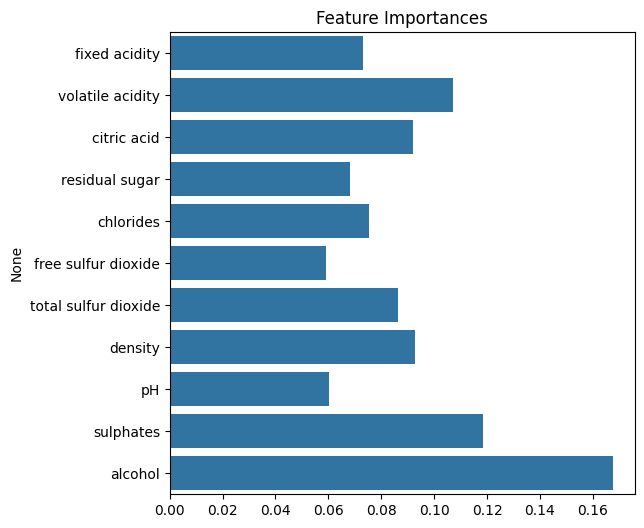

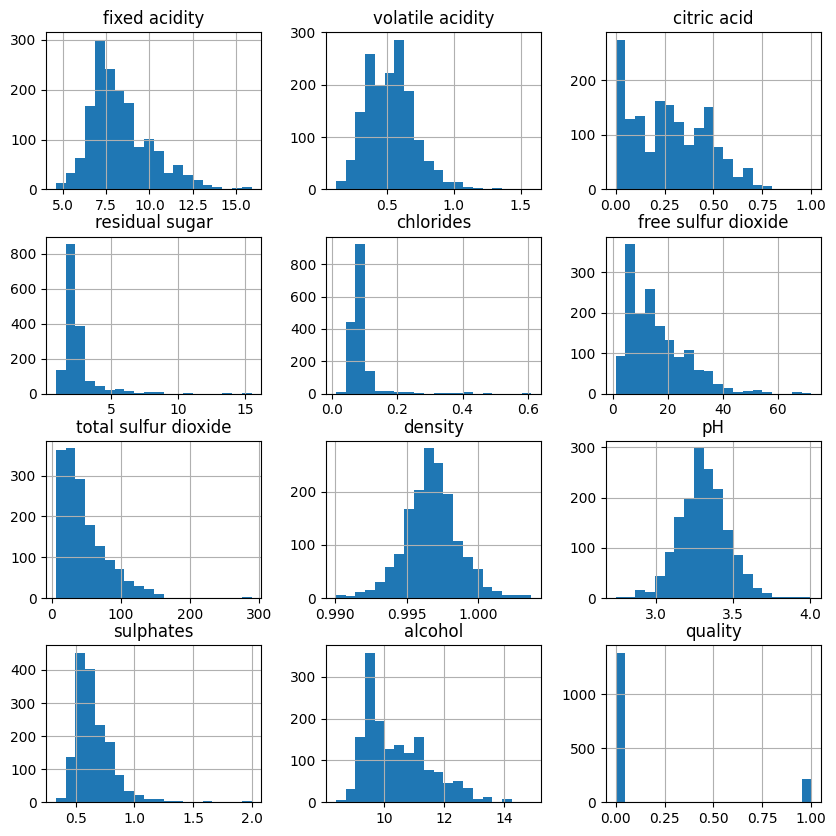

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'winequality-red.csv' with the path to your dataset file
data = pd.read_csv('datasest/winequality-red.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data['quality'].value_counts())

# Convert wine quality into a binary classification problem (Good or Bad quality)
# Here, we consider wine with quality >= 7 as 'Good' (1) and others as 'Bad' (0)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the feature importances
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()
data.hist(bins = 20, figsize = (10,10))
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('datasest/winequality-red.csv')

print(df.head())
print(df.describe())
print(df.info())

print(df.isnull().sum())

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = true,cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)
plt.title('corelation matrix')
plt.show()


x = df.drop('quality',axis = 1)
y = df['quality']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# initialize the randomforestregressor

model = RandomForestRegressor(n_estimators = 100,random_state = 42)

# train the model

model.fit(x_train,y_train)

# make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the feature importances
feature_importances = model.feature_importances_
features = X.columns


plt.figure(figsize = (10,6))
sns.barplot(x = 'Importance',y='Feature',data = feature_importance_df)
plt.title('Feature Importance')
plt.show()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

NameError: name 'true' is not defined

<Figure size 1200x800 with 0 Axes>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("datasest/Housing.csv")

# Printing first 5 records of the dataset
print(dataset.head(5))


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [22]:
dataset.shape

(545, 13)

In [23]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 7
Integer variables: 0
Float variables: 0


<Axes: >

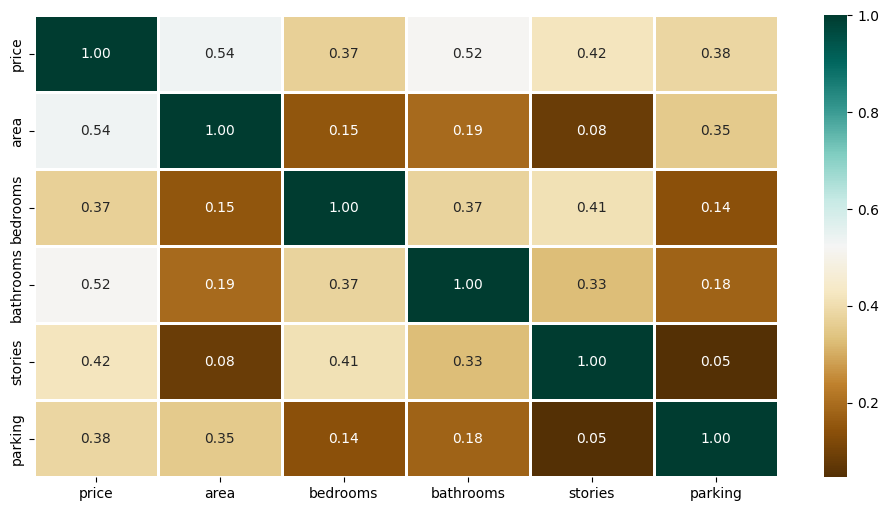

In [24]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)



<Axes: title={'center': 'No. Unique values of Categorical Features'}>

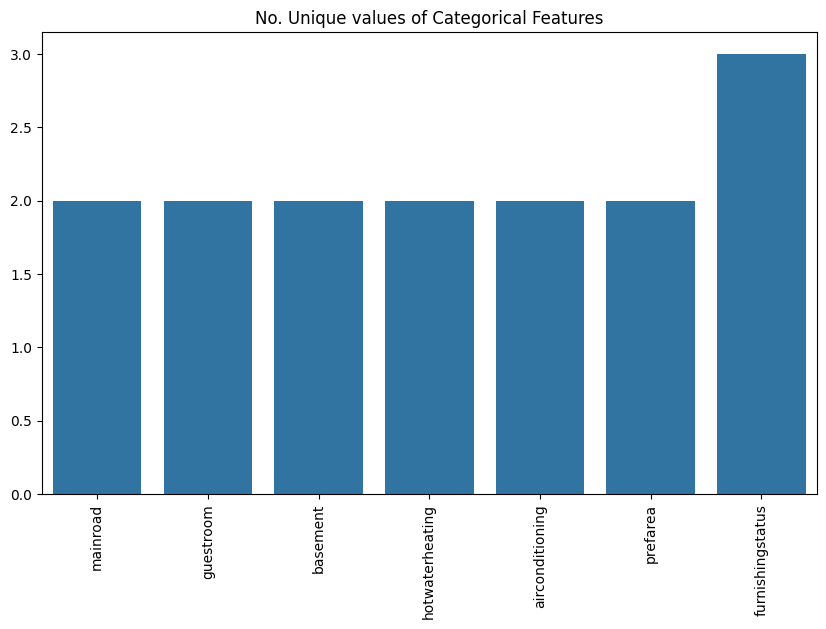

In [25]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


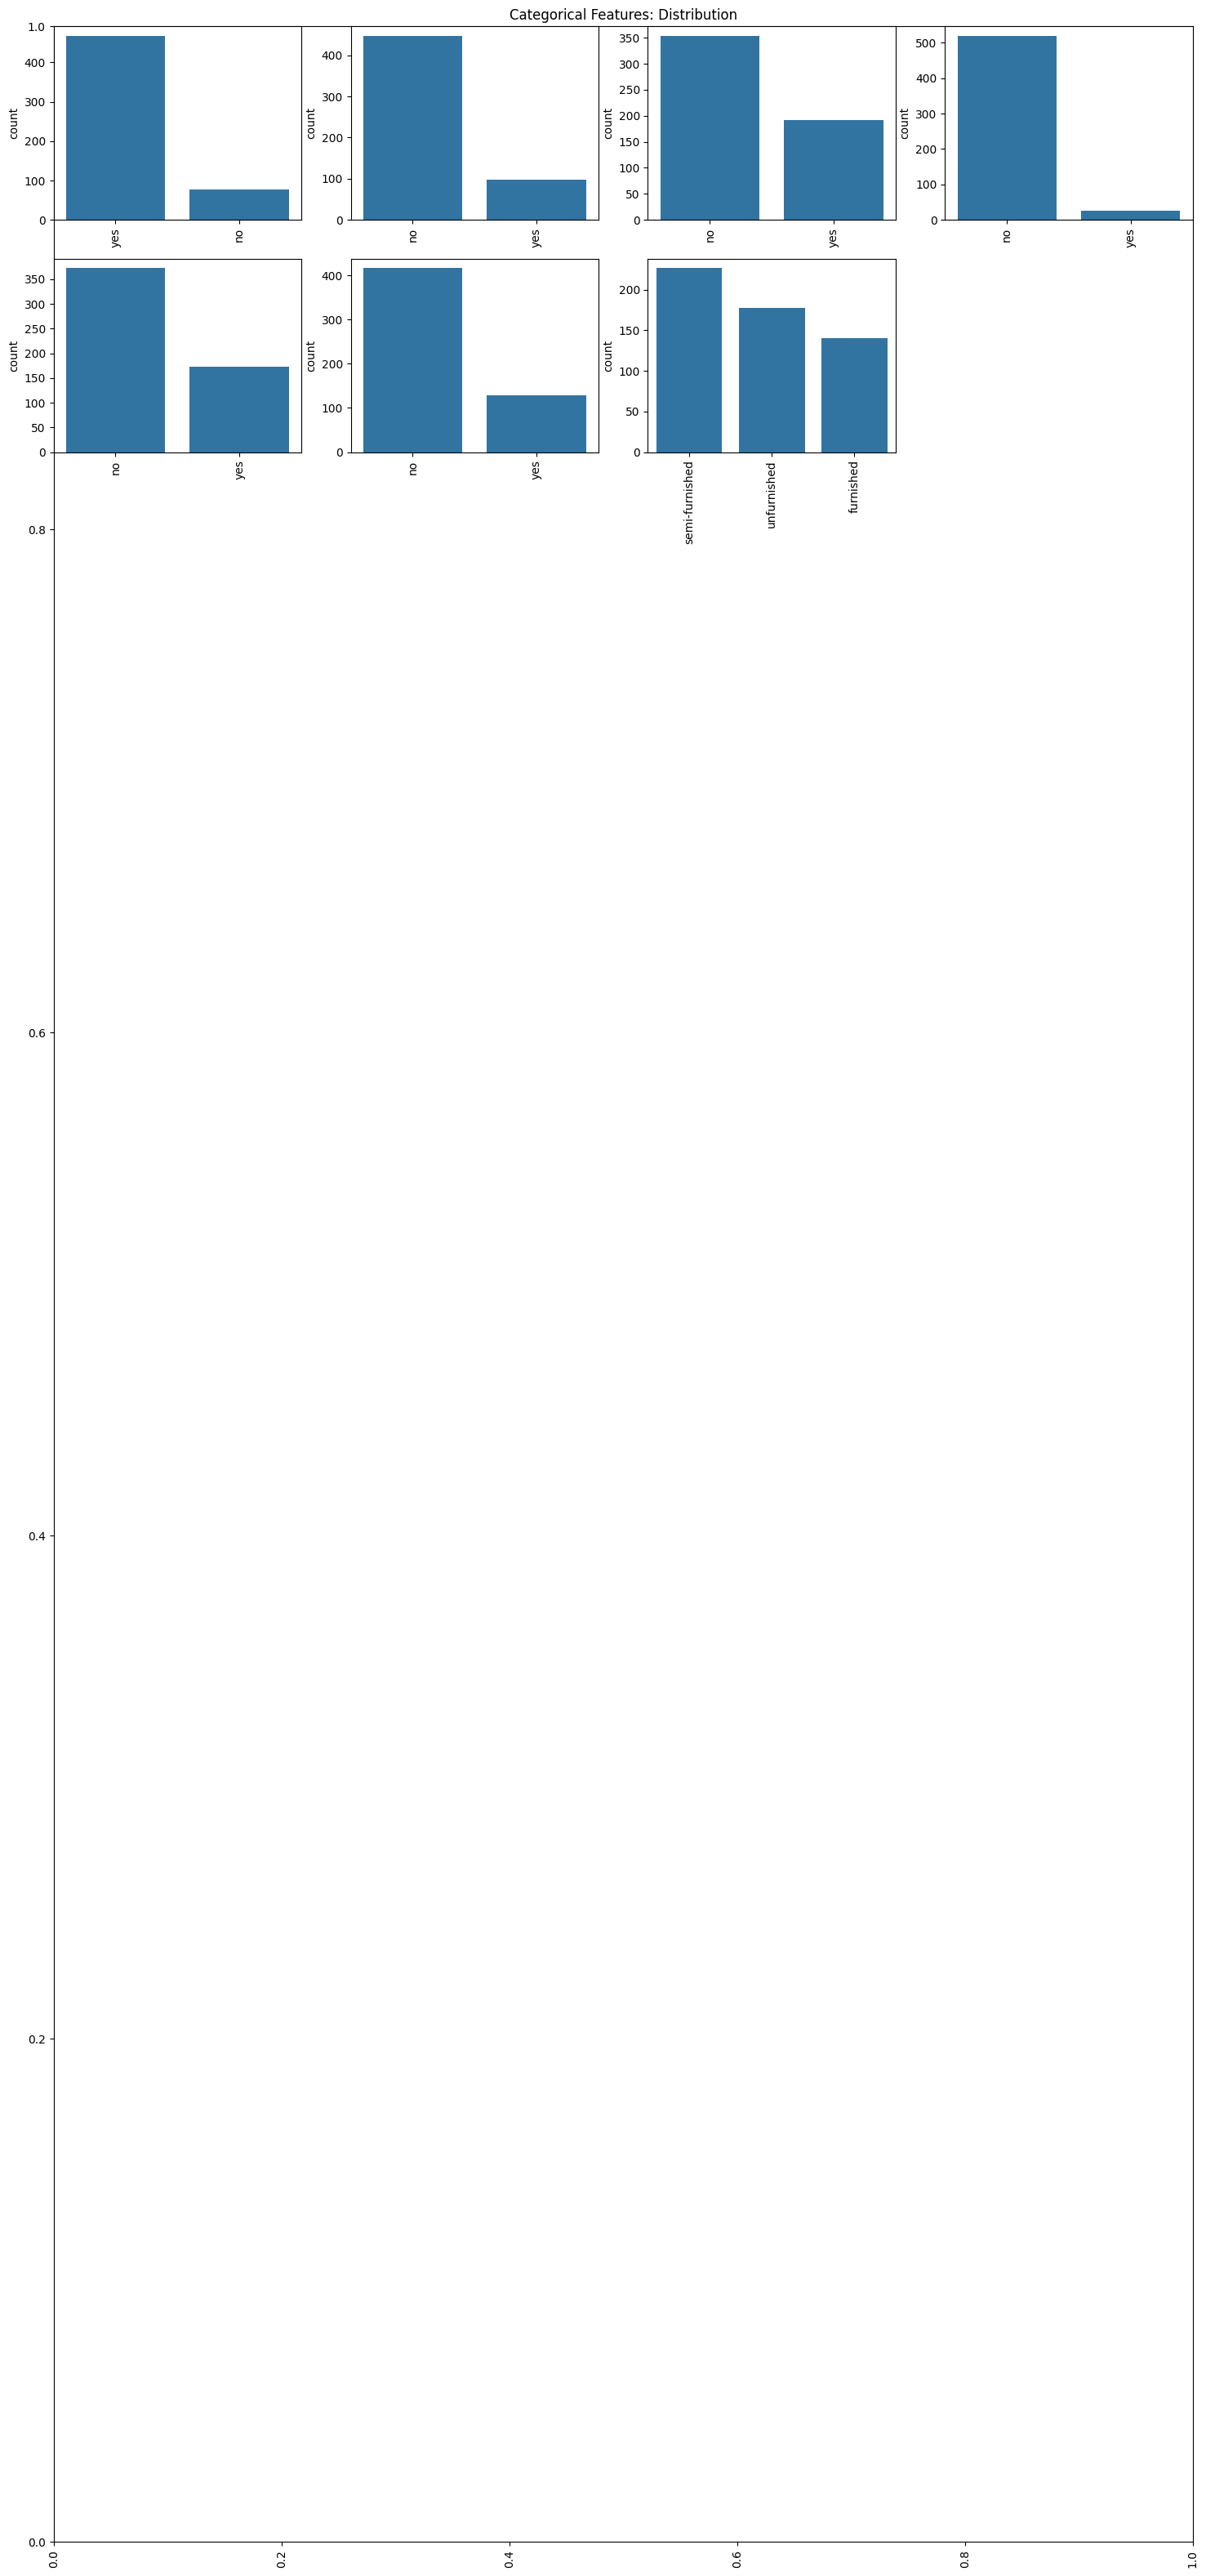

In [30]:
plt.figure(figsize=(18, 40))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [32]:
from sklearn.preprocessing import OneHotEncoder

s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
No. of. categorical features:  7


In [2]:
pip install chatterbot


     ---------------------------------------- 0.0/804.4 kB ? eta -:--:--
     ------------------------ ------------- 524.3/804.4 kB 5.7 MB/s eta 0:00:01
     -------------------------------------- 804.4/804.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/30.7 MB ? eta -:--:--
     - -------------------------------------- 0.8/30.7 MB 5.6 MB/s eta 0:00:06
     -- ------------------------------------- 2.1/30.7 MB 5.9 MB/s eta 0:00:05
     ----- ---------------------------------- 4.2/30.7 MB 7.4 MB/s eta 0:00:04
     -------- ------------------------------- 6.3/30.7 MB 8.0 MB/s eta 0:00:04
     ----------- ---------------------------- 8.7/30.7 MB 9.0 MB/s eta 0:00:03
     ------------- -------------------------- 10.5/30.7 MB 8.6 MB/s eta 0:00:03
     -----------

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [35 lines of output]
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'error'
    error: subprocess-exited-with-error
  
    python setup.py egg_info did not run successfully.
    exit code: 1
  
    [6 lines of output]
    Traceback (most recent call last):
      File "<string>", line 2, in <module>
      File "<pip-setuptools-caller>", line 34, in <module>
      File "C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Temp\pip-install-om6v140b\preshed_da4c0297f369469fa38a72b588b9d97f\setup.py", line 9, in <module>
        from distutils import ccompiler, msvccompiler
    ImportError: cannot import name 'msvccompiler' from 'distutils' (C:\Users\SHAIK MOHAMMED YUSUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_distutils\__init__.py). Did you mean: 'ccompiler'?
    [end of output]
  
    

In [3]:
pip install chatterbot_corpus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyYAML: filename=PyYAML-3.13-cp312-cp312-win_amd64.whl size=43111 sha256=c596a4d76cac2b868c945cbf3bd1fc7966dedc91fc5419b83bb7d853a0689ee6
  Stored in directory: c:\users\shaik mohammed yusuf\appdata\local\pip\cache\wheels\16\8f\dc\41349f3faf779c509beea0a3af5671234b704cb0eeedce6cc6
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-events 0.10.0 requires pyyaml>=5.3, but you have pyyaml 3.13 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install numpy pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Intercept (b0): -2.8967416617576873
Slope (b1): 2.624515127175384
Mean Squared Error: 559.9712425997458
R^2 Score: 0.17859214811239044


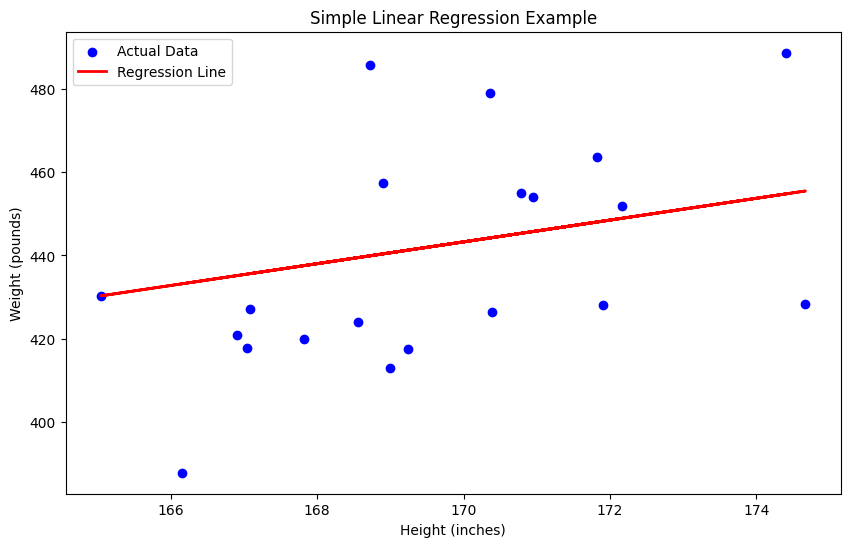

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generating synthetic data (height and weight example)
# Let's assume height (in inches) is the independent variable (X)
# and weight (in pounds) is the dependent variable (Y)

np.random.seed(0)  # For reproducibility
X = 2.5 * np.random.randn(100) + 170  # Heights around 170 cm
y = 2.3 * X + (20 * np.random.randn(100) + 50)  # Weights with some noise

# Convert X to a 2D array for scikit-learn (100 samples, 1 feature)
X = X.reshape(-1, 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)

# Output the coefficients
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()


In [1]:
pip install numpy matplotlib scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Coefficients (slope): [[2.9902591]]
Model INtercept (y-intercept): [4.20634019]
Mean squared error: 0.9177532469714291
R-squared: 0.6521157503858556


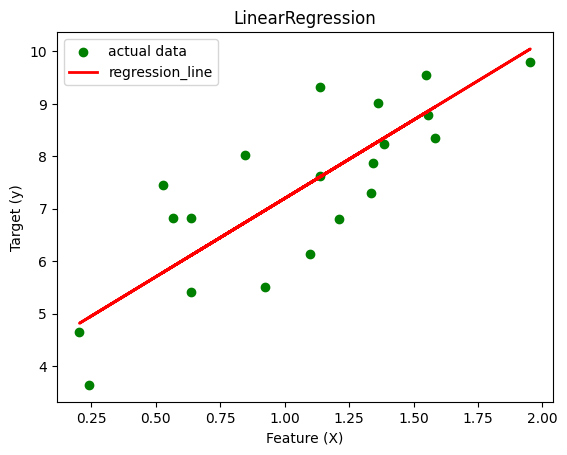

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# generate sample data (X: feature, y : target variable)
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# split the data into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)


# create the linear regression model
model = LinearRegression()

# fit the model to the training data 
model.fit(X_train,y_train)

# make predictions on the test data

y_pred = model.predict(X_test)

# evaluate the model's performance
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

# print the results
print("Model Coefficients (slope):",model.coef_)
print("Model INtercept (y-intercept):", model.intercept_)
print("Mean squared error:",mse)
print("R-squared:",r2)

# plot the regression line
plt.scatter(X_test,y_test,color = 'green',label = 'actual data')
plt.plot(X_test,y_pred,color = 'red',linewidth = 2, label = 'regression_line')
plt.title('LinearRegression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

In [7]:
np.random.seed(0)
X = np.random.rand(5)
print(X)


[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


In [8]:
from scipy import stats
import numpy as np

# Sample data
data = [5.3, 6.2, 5.8, 6.1, 5.9, 5.5, 6.3, 6.0, 5.7, 6.1]

# Known population mean
population_mean = 5.8

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(data, population_mean)

print("One-Sample t-Test")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Decide whether to reject the null hypothesis (commonly at alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Sample mean is significantly different.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


One-Sample t-Test
t-statistic: 0.8955334711889978
p-value: 0.3938228146915578
Fail to reject the null hypothesis. No significant difference.


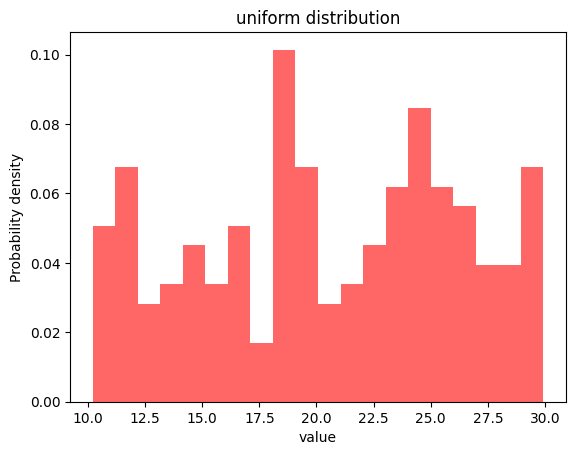

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

uniform_data = uniform.rvs(size = 180,loc = 10, scale = 20)
plt.hist(uniform_data,bins = 20, density = True,alpha = 0.6,color = 'red')
plt.title("uniform distribution")
plt.xlabel('value')
plt.ylabel('Probability density')
plt.show()

In [25]:
def is_prime(num):
    if num <= 2:
        return False
    for i in range(2,int(num **0.5)+1):
        if num % i == 0:
            return False
        return True
# exmaple 
number = 8
if is_prime(number):
    print(f"{number} the number is prime")
else:
    print(f"{number} the number is not prime")

8 the number is not prime


In [30]:
def is_prime_optimized(num):
    if num < 2:
        return False
    if num in(2,3):
        return True
    if num%2==0 or num%3==0:
        return False
    i = 5
    while i * i <=num:
        if num % i == 0 or num %(i+2)==0:
            return False
        i +=6
    return True
# exmple
number = 24
if is_prime_optimized(number):
    print(f"{number} is prime number")
else:
    print(f"{number} is not prime number")

24 is not prime number


In [1]:
pip install tensorflow matplotlib numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
